In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import scipy.stats as st

In [2]:
plt.style.use('tufte')

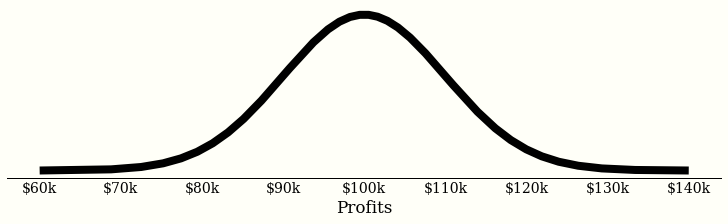

In [3]:
rv = st.norm(100, 10)

t = np.linspace(60, 140, 800)

fig, ax = plt.subplots(figsize=(10, 3), constrained_layout=True)

ax.plot(t, rv.pdf(t), lw=8)
fmt = '${x:,.0f}k'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

ax.yaxis.set_visible(False)

for spine in ('left', 'right', 'top'):
    ax.spines[spine].set_visible(False)
    
ax.set_xlabel("Profits")
    
fig.savefig('img/profits.png')

In [4]:
player_1 = np.array([0.1, 0.2, 0.4, 0.2, 0.1])
player_2 = np.array([0.01, 0.2, 0.4, 0.28, 0.11])
player_3 = np.array([0.05, 0.45, 0.33, 0.11, 0.06])
player_4 = np.array([0.25, 0.1, 0.1, 0.1, 0.45])


players = np.array([player_1, player_2, player_3, player_4])
players.sum(axis=1)

array([1., 1., 1., 1.])

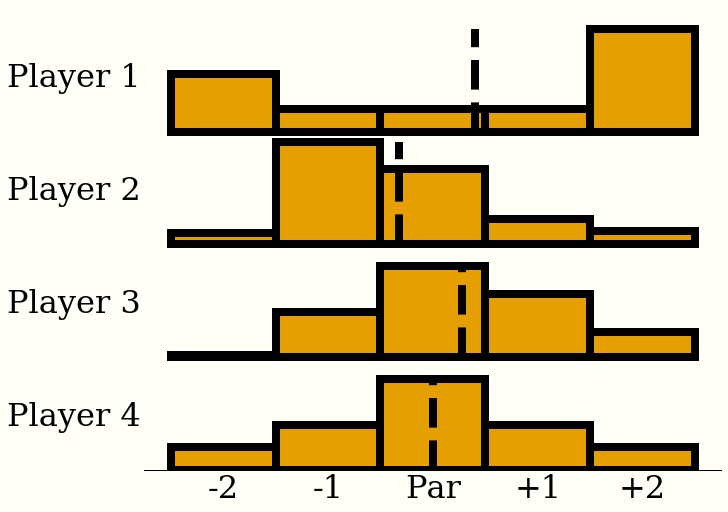

In [5]:
rv = st.norm(100, 10)


fig, ax = plt.subplots(figsize=(10, 7), constrained_layout=True)

gap = players.max() * 1.1
x = np.arange(-2, 3)
ticks = []
for idx, p in enumerate(players):
    ax.bar(x, p, bottom=idx * gap, color='C2', edgecolor='k', width=1, linewidth=8)
    ax.vlines(p.dot(x), idx * gap, idx * gap + p.max(), lw=8, linestyle='dashed')
    ticks.append((idx + 0.5) * gap)

ax.set_yticks(ticks)
ax.set_yticklabels([f"Player {5 - idx}" for idx in range(1, 5)])
for spine in ('left', 'right', 'top'):
    ax.spines[spine].set_visible(False)

ax.set_xticklabels(["", "-2", "-1", "Par", "+1", "+2", ""])
ax.tick_params(labelsize=32)
fig.savefig('img/golf.png');

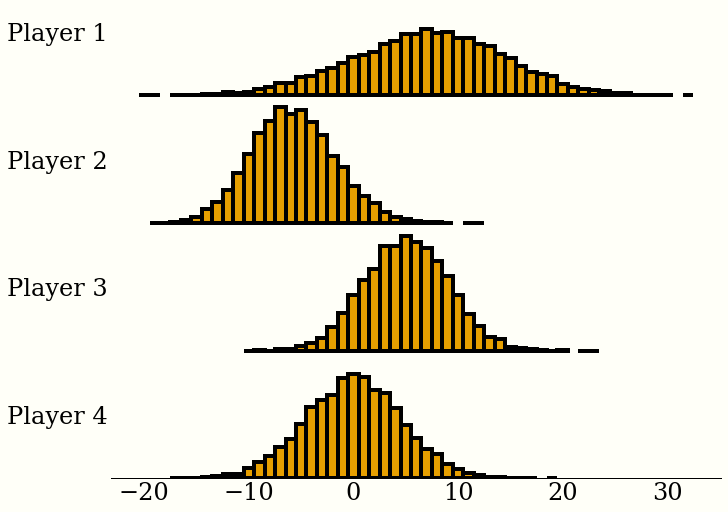

In [6]:
rv = st.norm(100, 10)


fig, ax = plt.subplots(figsize=(10, 7), constrained_layout=True)
bins, counts = [], []
x = np.arange(-2, 3)
for idx, p in enumerate(players):
    score = np.random.choice(x, p=p, size=(10_000, 18)).sum(axis=1)
    bin_, count = np.unique(score, return_counts=True)
    bins.append(bin_)
    counts.append(count)

gap = max(c.max() for c in counts) * 1.1
ticks = []
for idx, (bin_, count) in enumerate(zip(bins, counts)):
    ax.bar(bin_, count, bottom=idx * gap, color='C2', edgecolor='k', width=1, linewidth=4)
    ticks.append((idx + 0.5) * gap)
#     ax.vlines(p.dot(x), idx * gap, idx * gap + p.max(), lw=8, linestyle='dashed')

ax.set_yticks(ticks)
ax.set_yticklabels([f"Player {5 - idx}" for idx in range(1, 5)])

for spine in ('left', 'right', 'top'):
    ax.spines[spine].set_visible(False)

ax.tick_params(labelsize=24)
fig.savefig('img/stroke.png');

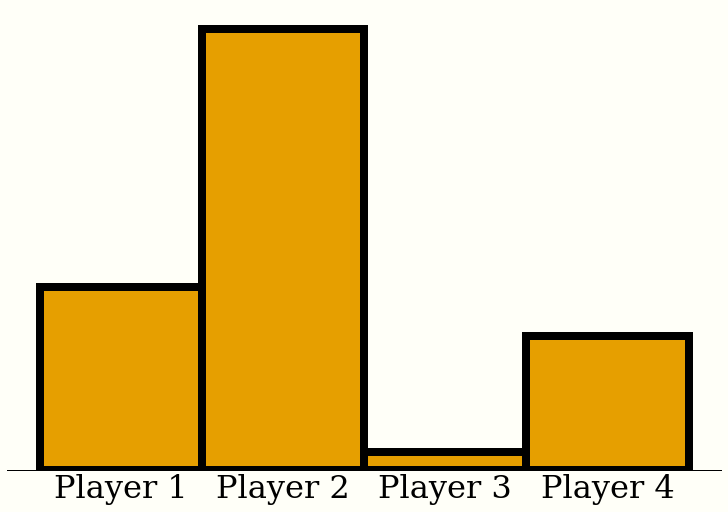

In [7]:
scores = []
x = np.arange(-2, 3)
for idx, p in enumerate(players):
    scores.append(np.random.choice(x, p=p, size=(100_000, 18)))
scores = np.array(scores)

outcomes = np.array([(np.min(scores, axis=0) == score).sum(axis=1) for score in scores])

win_pct = (outcomes == outcomes.max(axis=0)).mean(axis=1)

fig, ax = plt.subplots(figsize=(10, 7), constrained_layout=True)
x = np.arange(4, 0, -1)
ax.bar(x, win_pct, color='C2', edgecolor='k', width=1, linewidth=8)

ax.set_xticks(x)
ax.set_xticklabels([f"Player {idx}" for idx in x])
ax.tick_params(labelsize=32)

ax.yaxis.set_visible(False)
for spine in ('left', 'right', 'top'):
    ax.spines[spine].set_visible(False)

fig.savefig('img/match.png');

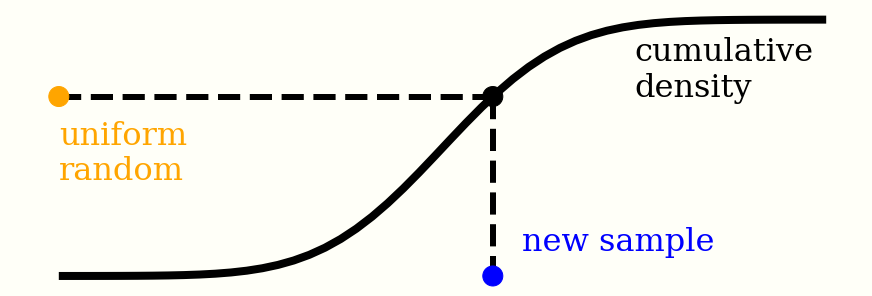

In [8]:
fig, ax = plt.subplots(figsize=(12, 4), constrained_layout=True)

t = np.linspace(-4, 4)
rv = st.norm()

u = 0.7

ax.plot(t, rv.cdf(t), lw=8)
ax.hlines(u, t.min(), rv.ppf(u), lw=6, linestyles='dashed')
ax.vlines(rv.ppf(u), u, 0, lw=6, linestyles='dashed')

ax.scatter([t.min(), rv.ppf(u), rv.ppf(u)], [u, u, 0], c=['orange', 'black', 'blue'], s=400, zorder=100)
ax.set_ylim(-0.05, 1.05)

ax.text(t.min(), rv.ppf(u) - 0.15, "uniform\nrandom", fontsize=32, color='orange')

ax.text(rv.ppf(u) + 0.3, 0.1, "new sample", fontsize=32, color='blue')

ax.text(2, 0.7, "cumulative\ndensity", fontsize=32, color='black')
ax.axis('off')

fig.savefig('img/cdf.png');

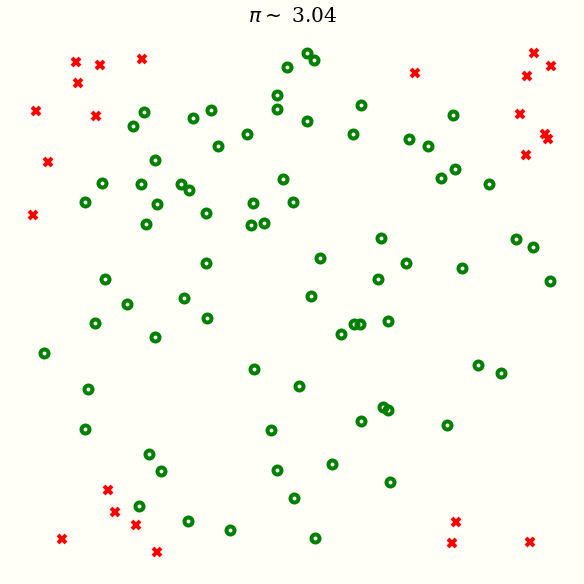

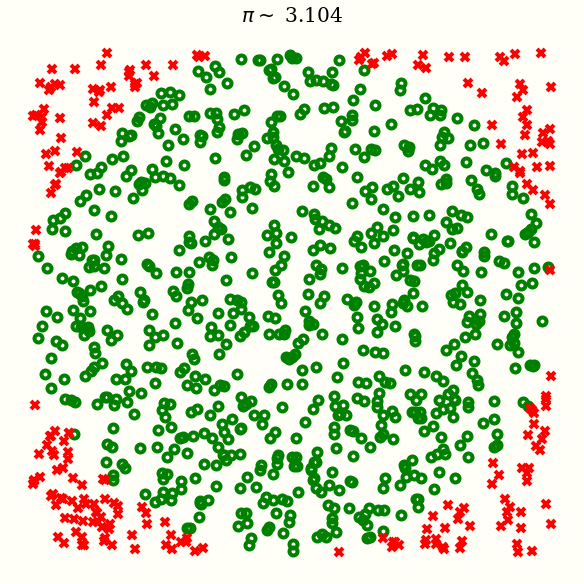

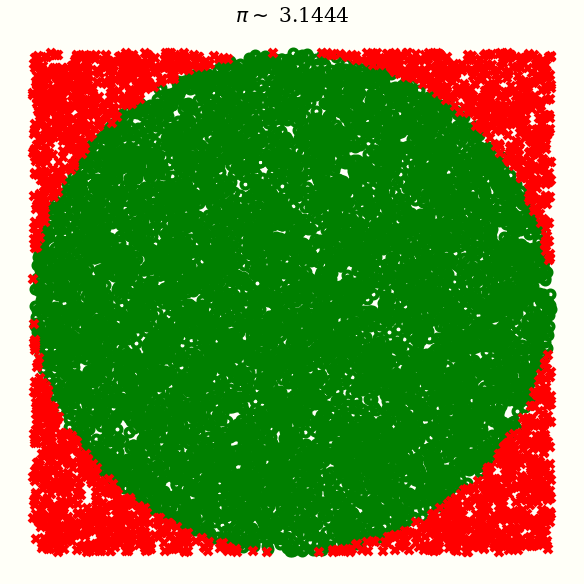

In [9]:
for n in (100, 1_000, 10_000):
    draws = np.random.uniform(-1, 1, size=(n, 2))

    in_circle = (draws[:, 0] ** 2 + draws[:, 1] ** 2 < 1)

    fig, ax = plt.subplots(figsize=(8, 8), constrained_layout=True)

    ax.plot(*draws[in_circle].T, 'go', mew=4)
    ax.plot(*draws[~in_circle].T, 'rx', mew=4)
    ax.set_title(f"$\pi \sim$ {4 * in_circle.mean()}")
    ax.axis('off')
    fig.savefig(f'img/circle_{n}.png');


In [10]:
np.random.normal()

-0.13196814079229888

In [11]:
def metropolis_hastings(n_samples, pdf, scale=0.01):
    position = 0.
    samples = []
    prop = st.norm(scale=scale)
    for proposal in prop.rvs(n_samples):
        proposal = proposal + position
        accept_prob = pdf(proposal) / pdf(position)
        if np.random.rand() < accept_prob:
            position = proposal
        samples.append(position)
    return np.array(samples)

In [12]:
s = metropolis_hastings(10_000, st.norm().pdf, scale=0.1)

In [13]:
import arviz as az

In [14]:
import itertools

/home/colin/projects/arviz/arviz/plots/traceplot.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  len(plotters), 2, squeeze=False, figsize=figsize, constrained_layout=True
/home/colin/projects/arviz/arviz/plots/traceplot.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  len(plotters), 2, squeeze=False, figsize=figsize, constrained_layout=True
/home/colin/projects/arviz/arviz/plots/traceplot.py:183: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retain

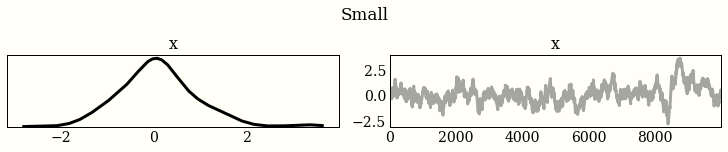

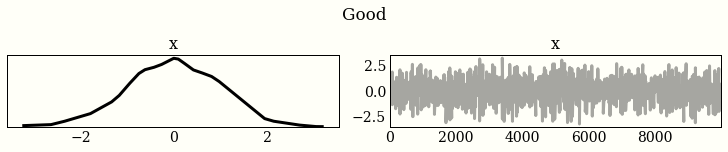

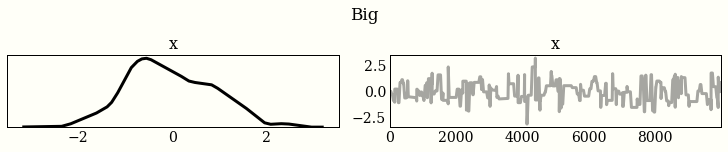

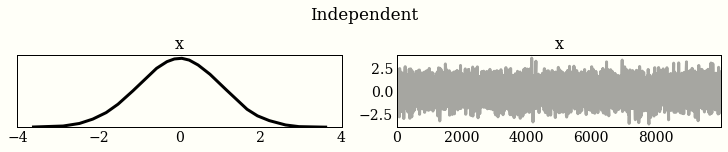

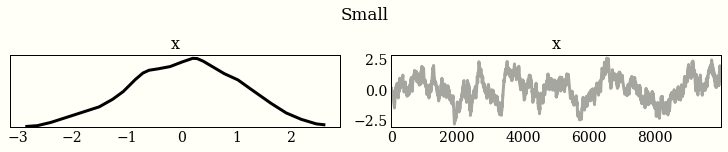

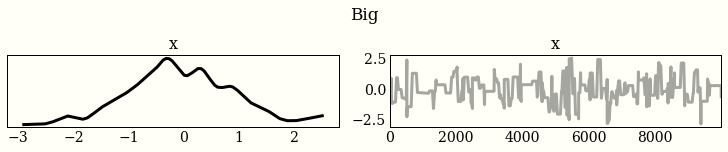

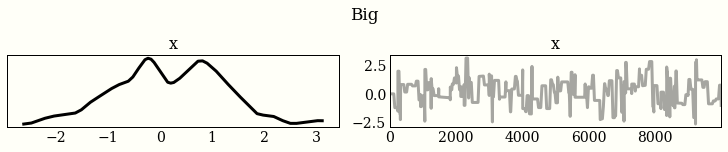

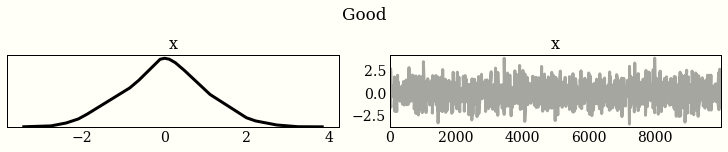

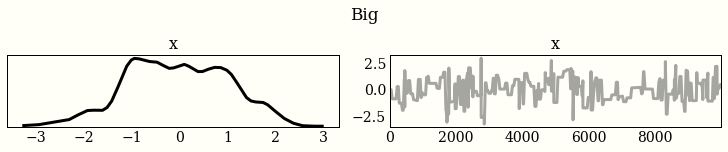

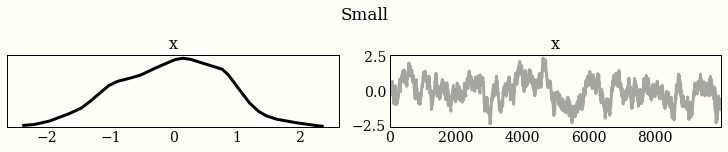

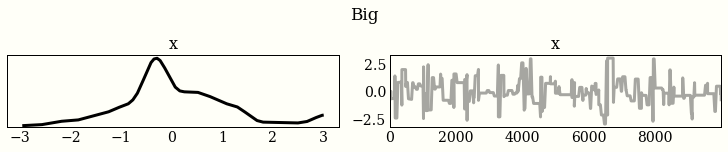

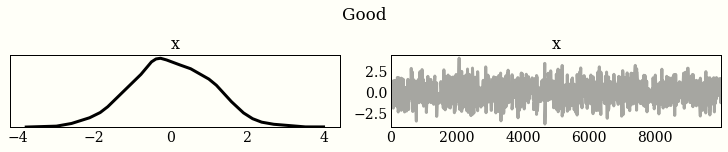

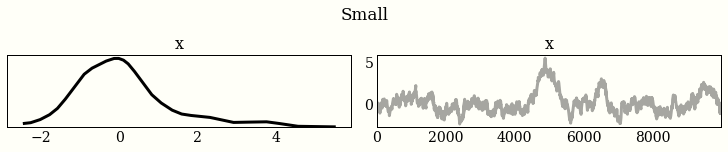

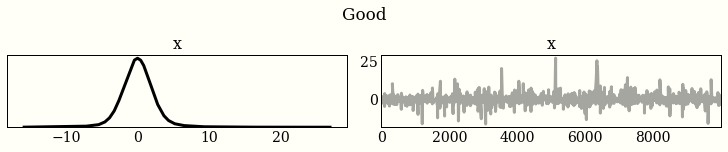

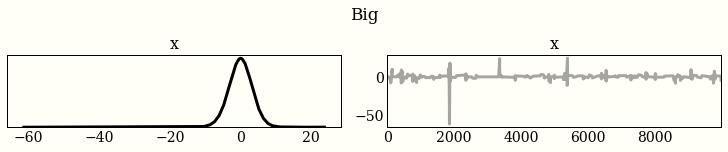

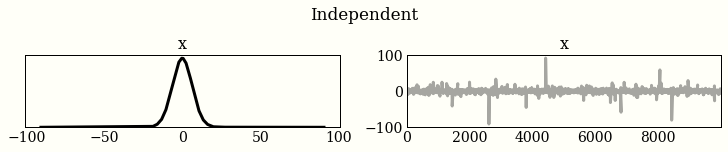

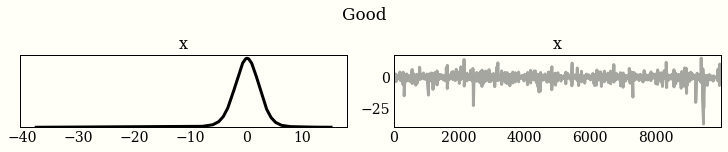

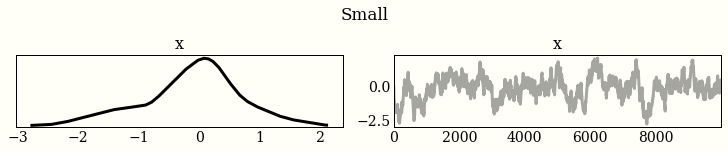

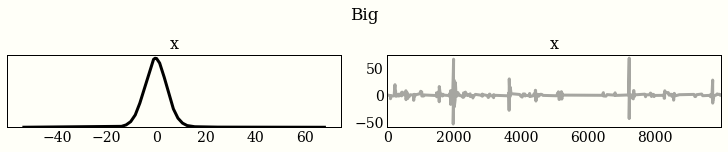

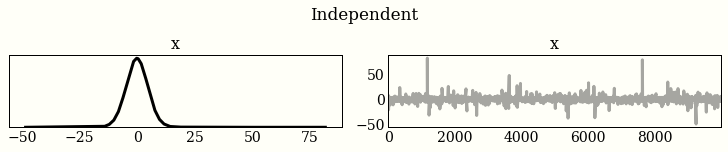

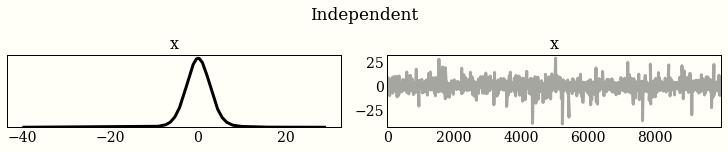

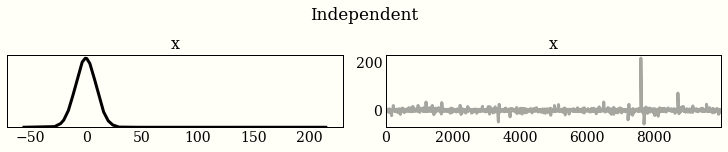

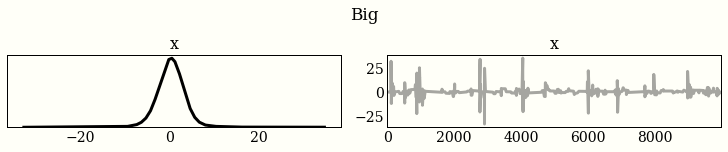

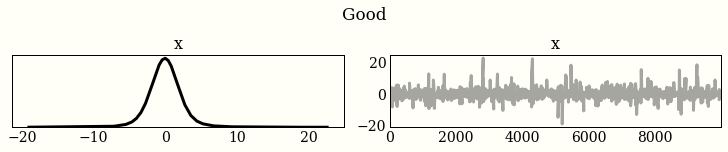

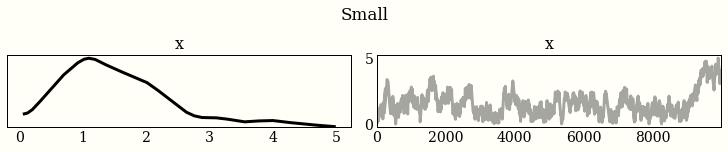

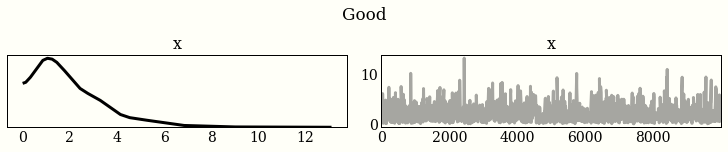

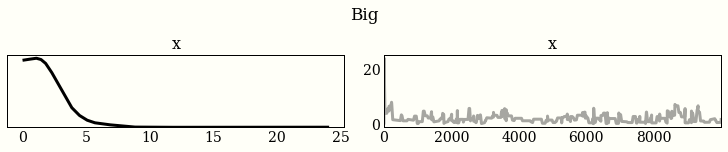

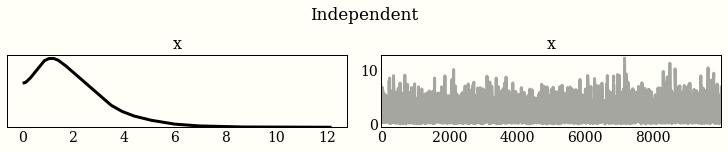

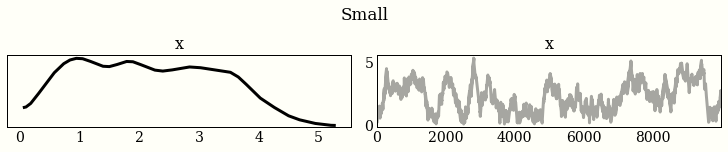

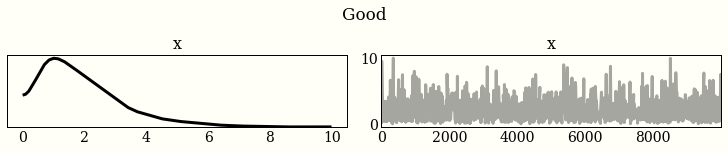

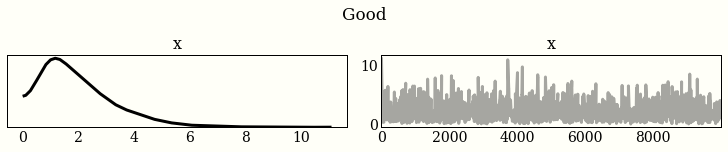

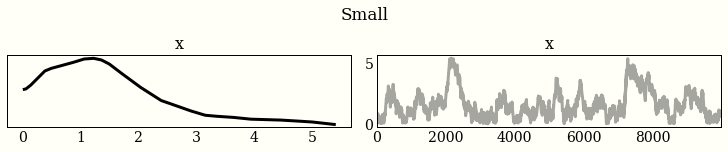

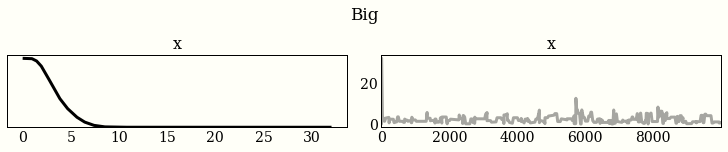

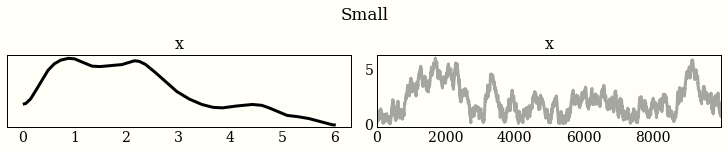

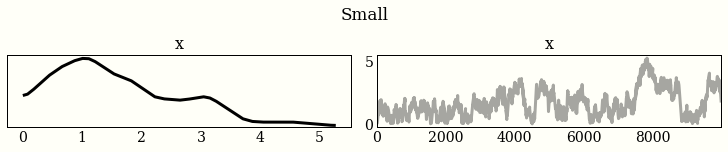

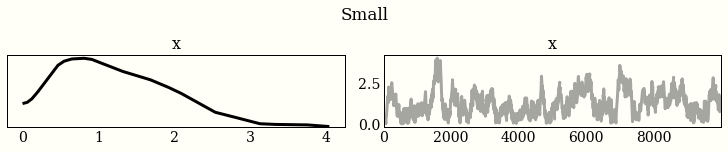

In [16]:
idx = 0
for rv_name, rv in (('Normal(0, 1)', st.norm()), ('StudentT(df=2)', st.t(2)), ('Gamma(2)', st.gamma(2))):
    for choice in itertools.chain((0, 1, 2, 3), np.random.randint(0, 4, 8)):
        answer, scale = (("Small", 0.1), ("Good", 7), ("Big", 70), ("Independent", None))[choice]
        if scale is None:
            samples = rv.rvs(10_000)
        else:
            samples = metropolis_hastings(10_000, rv.pdf, scale=scale)
        ax = az.plot_trace(samples, figsize=(10, 2))
        fig = ax[0, 0].get_figure()
        fig.suptitle(rv_name)
        fig.savefig(f'img/quiz{idx}.png')
        fig.suptitle(answer)
        fig.savefig(f'img/quiz{idx}a.png')
        idx += 1


In [17]:
import pymc3 as pm

In [18]:
with pm.Model():
    pm.Normal('x')
    trace = pm.sample(step=pm.Metropolis(S=np.array([0.01])), tune=0)

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [x]
Sampling 4 chains: 100%|██████████| 2000/2000 [00:00<00:00, 7619.54draws/s]
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


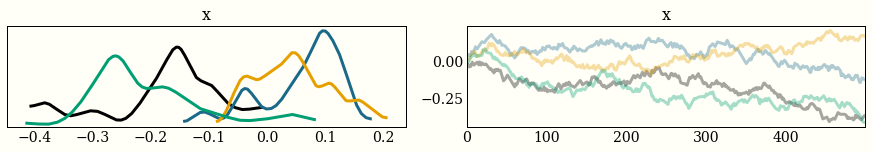

In [24]:
axes = az.plot_trace(trace);
fig = axes[0, 0].get_figure()
fig.savefig('img/pymc_trace.png')

In [20]:
with p

SyntaxError: invalid syntax (<ipython-input-20-2018752de222>, line 1)

In [ ]:
az.plot_trace(az.load_arviz_data('non_centered_eight'), var_names=['mu', 'tau'], combined=True);